# Connect-4 data generator V4

In [1]:
import numpy as np
import random
from tqdm.auto import tqdm
import time
import pandas as pd
from C4.c4_move_data_generator import *
import matplotlib.pyplot as plt

print("All dependencies imported successfully.")

All dependencies imported successfully.


In [2]:
maxDepth = 3
PLAYS = {}
N_games = random.randint(5, 10)
for game in range(N_games):
    A = random.randint(1, maxDepth)
    B = random.randint(1, maxDepth)
    label = f"L{A}L{B}"
    PLAYS[label] = {"A": A, "B": B, "games": random.randint(5, 10)}

PLAYS

{'L2L3': {'A': 2, 'B': 3, 'games': 9},
 'L1L3': {'A': 1, 'B': 3, 'games': 5},
 'L1L2': {'A': 1, 'B': 2, 'games': 9},
 'L2L2': {'A': 2, 'B': 2, 'games': 8},
 'L2L1': {'A': 2, 'B': 1, 'games': 8},
 'L3L3': {'A': 3, 'B': 3, 'games': 8}}

In [3]:
#DATA_FILE = "DATA/C4.play_data.xlsx"
DATA_FILE = "DATA/C4.L1L2L3_play_data.xlsx"

In [4]:
CFG = {}

In [5]:
from tqdm.auto import tqdm
import pandas as pd

records = []
for label, cfg in tqdm(PLAYS.items()):
    records.extend(generate_dataset({label: cfg}, seed=666, CFG=CFG))

df_new   = records_to_dataframe(records)   # columns: label, reward, game, ply, 0-0..5-6
df_saved = upsert_excel(df_new, DATA_FILE)
print("Saved", len(df_saved), "unique rows")

  0%|          | 0/6 [00:00<?, ?it/s]

Saved 6950 unique rows


In [6]:
df_new[["reward"]].describe()

,reward
count,830.000000
mean,77.369880
std,229.056407
min,-101.000000
25%,6.950000
50%,21.950000
75%,43.950000
max,1000.000000


In [7]:
df_saved[["reward"]].describe()

,reward
count,6950.000000
mean,66.374698
std,209.023650
min,-101.000000
25%,6.950000
50%,19.900000
75%,37.000000
max,1000.000000


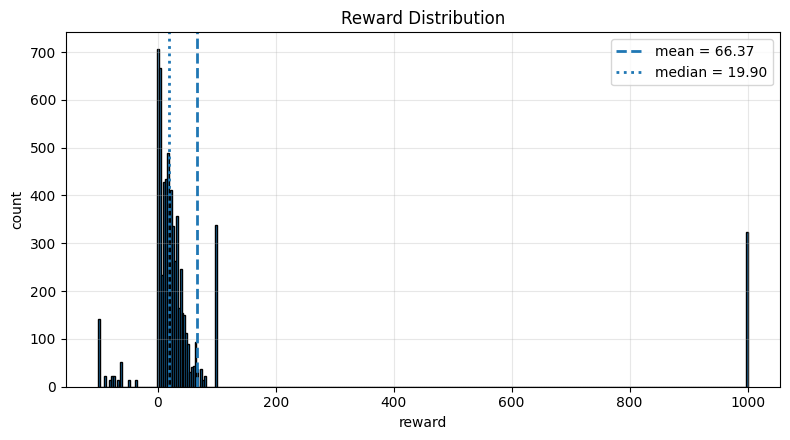

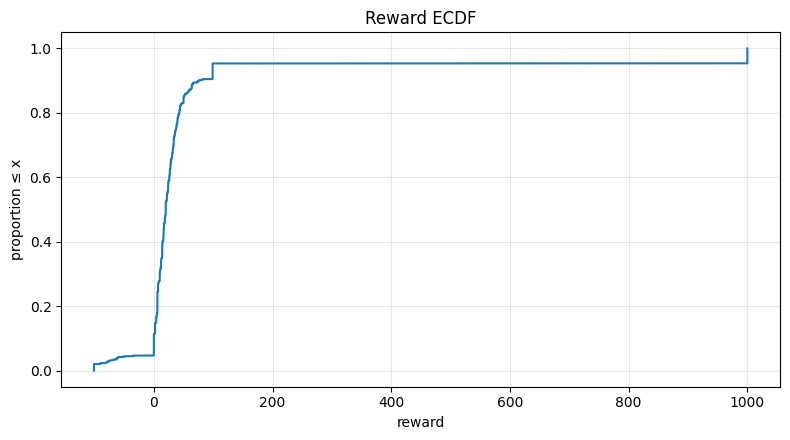

In [8]:
r = df_saved["reward"].astype(float).dropna()

# --- Histogram ---
fig, ax = plt.subplots(figsize=(8,4.5))
bins = np.arange(r.min()-0.5, r.max()+1.5, 1) if np.allclose(r, r.round()) else "auto"
n, bins, _ = ax.hist(r, bins=bins, edgecolor="black")
ax.axvline(r.mean(),   ls="--", lw=2, label=f"mean = {r.mean():.2f}")
ax.axvline(r.median(), ls=":",  lw=2, label=f"median = {r.median():.2f}")
ax.set(title="Reward Distribution", xlabel="reward", ylabel="count")
ax.grid(True, alpha=0.3)
ax.legend()
fig.tight_layout()

r_sorted = np.sort(r.values)
y = np.arange(1, len(r_sorted)+1) / len(r_sorted)
plt.figure(figsize=(8,4.5))
plt.plot(r_sorted, y)
plt.title("Reward ECDF")
plt.xlabel("reward")
plt.ylabel("proportion ≤ x")
plt.grid(True, alpha=0.3)
plt.tight_layout()
